In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
rng = np.random.default_rng(42)

def generate_students(n=200, seed=42):
    rng = np.random.default_rng(seed)
    hours_studied = rng.normal(5, 2, n).clip(1, 10)
    marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
    gender = rng.choice(['Male', 'Female'], n)
    subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
    study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
    attempts = rng.integers(1, 4, n)
    return pd.DataFrame({
        'hours_studied': hours_studied.round(2),
        'marks': marks.round(2),
        'gender': gender,
        'subject': subject,
        'study_method': study_method,
        'attempts': attempts
    })

def generate_daily_sales(n=60, seed=42):
    rng = np.random.default_rng(seed)
    base = pd.date_range(start='2024-01-01', periods=n, freq='D')
    trend = np.linspace(50, 80, n)
    season = 8 * np.sin(np.linspace(0, 3 * np.pi, n))
    noise = rng.normal(0, 3, n)
    sales = (trend + season + noise).round(2)
    return pd.DataFrame({'date': base, 'sales': sales})

# Example usage
students = generate_students(220)
sales = generate_daily_sales(90)

In [15]:
students.head()

,hours_studied,marks,gender,subject,study_method,attempts
0,5.61,54.04,Male,English,Solo,2
1,2.92,30.00,Female,Science,Solo,2
2,6.50,70.46,Female,History,Group,3
3,6.88,52.76,Female,English,Group,3
4,1.10,30.00,Female,History,Solo,1


In [16]:
sales.head()

,date,sales
0,2024-01-01,50.91
1,2024-01-02,48.06
2,2024-01-03,54.61
3,2024-01-04,56.33
4,2024-01-05,48.78


<Axes: xlabel='date', ylabel='sales'>

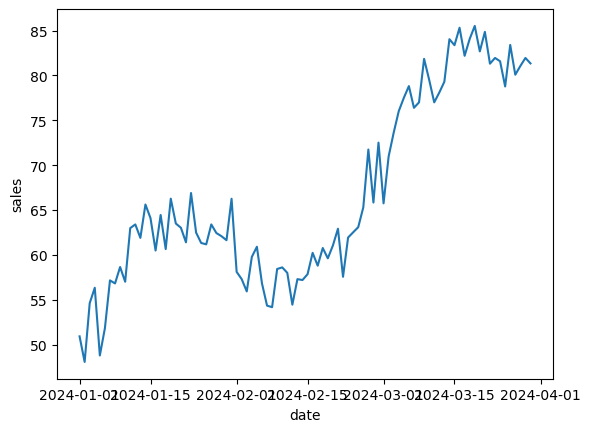

In [17]:
sns.lineplot(data=sales, x='date', y='sales')

<Axes: xlabel='hours_studied', ylabel='marks'>

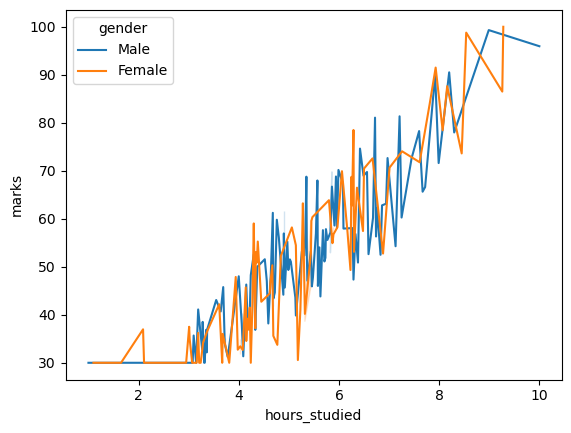

In [18]:
sns.lineplot(data=students, x='hours_studied', y='marks', hue='gender')

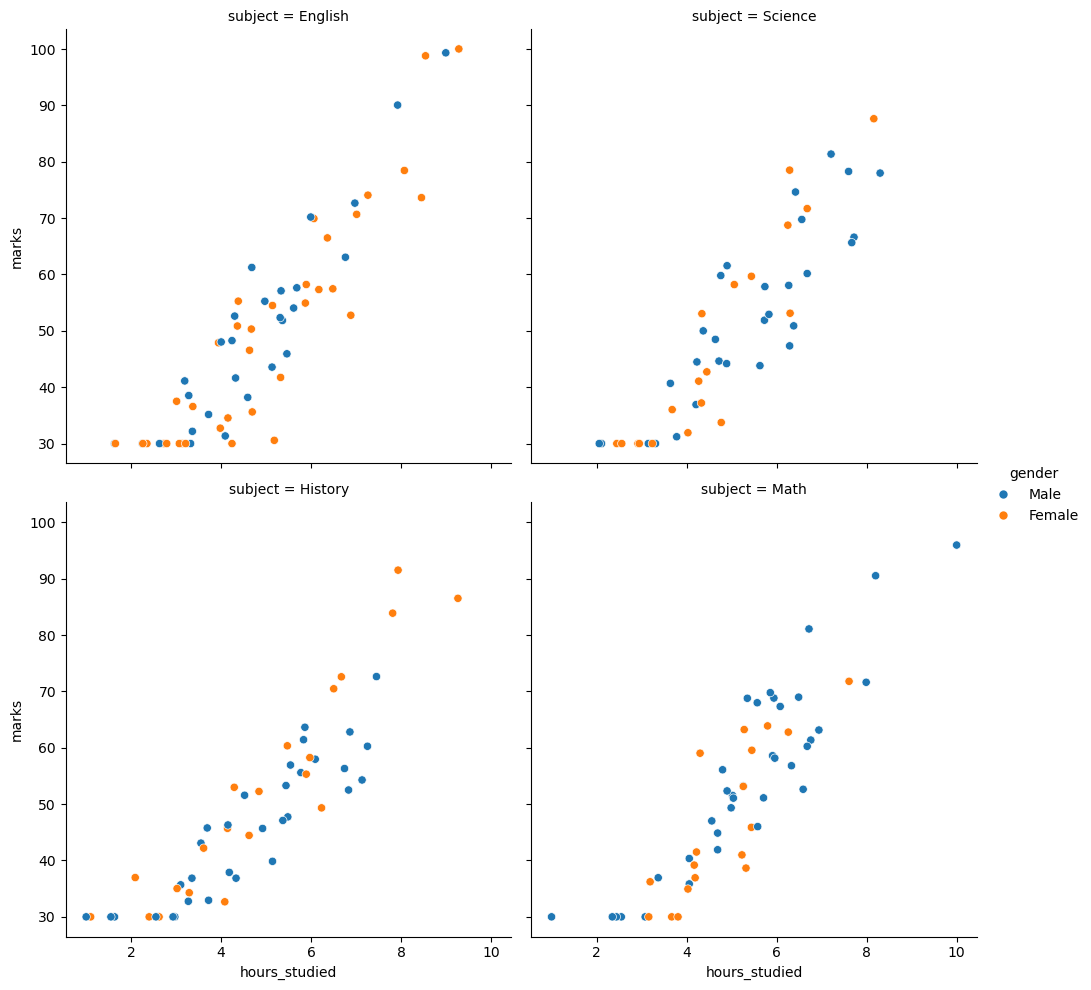

In [20]:
sns.relplot(kind='scatter', data=students, x="hours_studied", y="marks", col="subject", hue="gender", col_wrap=2)

<Axes: ylabel='Count'>

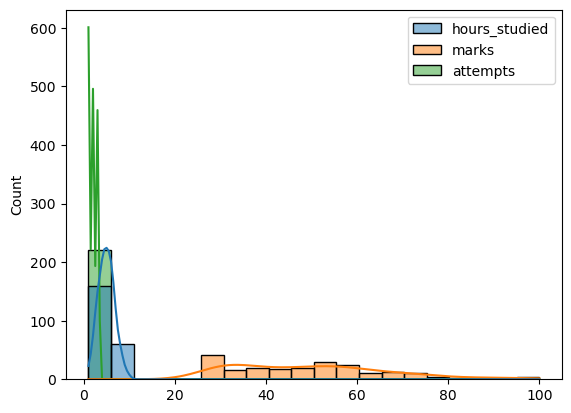

In [22]:
sns.histplot(data=students, kde=True, bins=20)

<Axes: xlabel='hours_studied', ylabel='Density'>

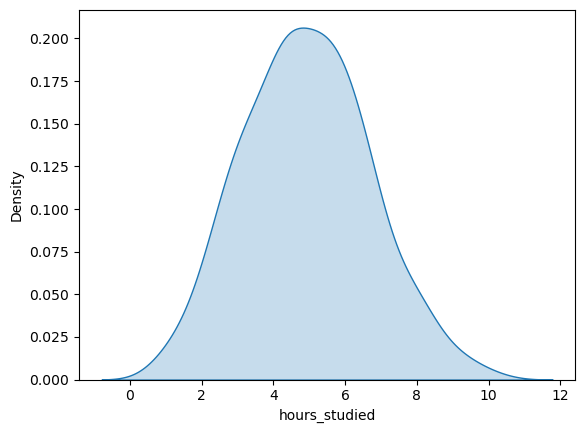

In [23]:
sns.kdeplot(data=students, x='hours_studied', fill=True)

In [24]:
students['subject'].value_counts()

subject
English    63
History    54
Math       54
Science    49
Name: count, dtype: int64

<Axes: xlabel='hours_studied', ylabel='marks'>

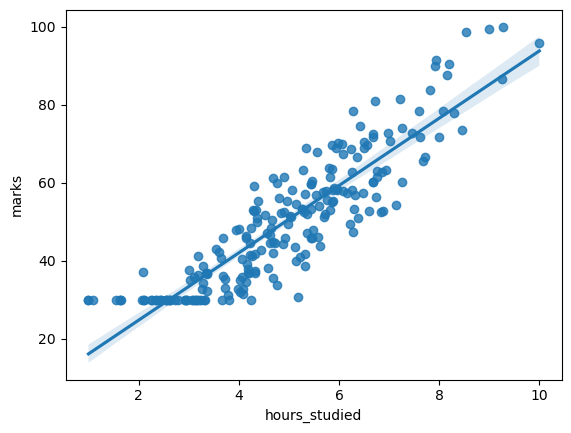

In [27]:
sns.regplot(data=students, x='hours_studied', y='marks')

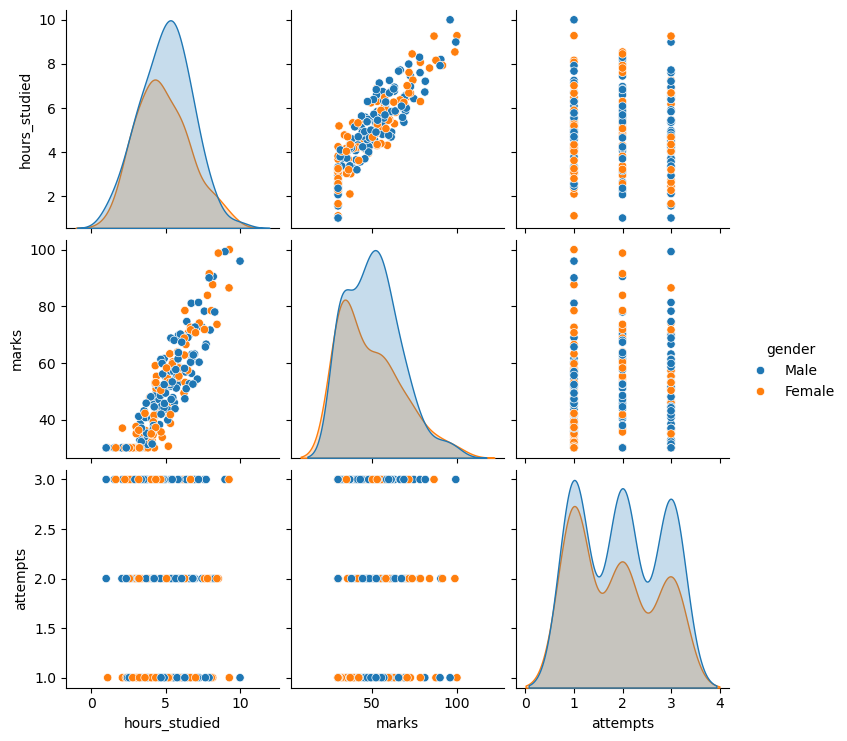

In [31]:
sns.pairplot(students, hue='gender')

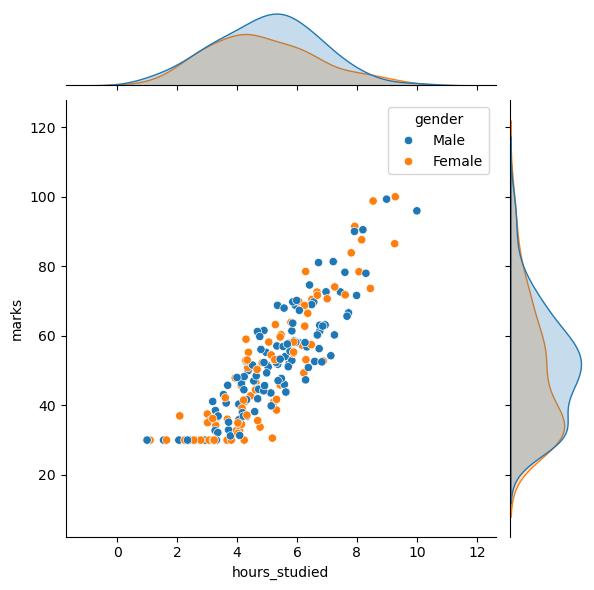

In [32]:
sns.jointplot(data=students, x="hours_studied", y="marks", kind="scatter", hue="gender")